# Foundations for Analytics with Python (ch3)

## Excel 파일 열기 (pandas)

In [1]:
import pandas as pd
data_frame = pd.read_excel('sales_2013.xlsx', sheet_name = 'january_2013')
print(data_frame)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
0         1234          John Smith       100-0002         1200      1/1/2013
1         2345       Mary Harrison       100-0003         1425      1/6/2013
2         3456          Lucy Gomez       100-0004         1390     1/11/2013
3         4567        Rupert Jones       100-0005         1257     1/18/2013
4         5678       Jenny Walters       100-0006         1725     1/24/2013
5         6789  Samantha Donaldson       100-0007         1995     1/31/2013


## Excel 파일 필터링하기 (pandas)

In [3]:
data_frame = \ 
pd.read_excel('sales_2013.xlsx', sheet_name = 'january_2013', index_col=None)


data_frame_value_meets_condition = \
data_frame[(data_frame['Sale Amount'].astype(float) > 1400.0)]
print(data_frame_value_meets_condition)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
1         2345       Mary Harrison       100-0003         1425      1/6/2013
4         5678       Jenny Walters       100-0006         1725     1/24/2013
5         6789  Samantha Donaldson       100-0007         1995     1/31/2013


## Excel 파일 필터링하기 (pandas) - 리스트 포함 여부 (.isin)

In [5]:
data_frame = \
pd.read_excel('sales_2013.xlsx', sheet_name = 'january_2013', index_col=None)

important_dates = ['1/24/2013', '1/31/2013']
data_frame_value_in_set = \
data_frame[data_frame['Purchase Date'].isin(important_dates)]

print(data_frame_value_in_set)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
4         5678       Jenny Walters       100-0006         1725     1/24/2013
5         6789  Samantha Donaldson       100-0007         1995     1/31/2013


## Excel 파일 필터링하기 (pandas) - 패턴 활용(.startswith)

In [7]:
data_frame = \
pd.read_excel('sales_2013.xlsx', sheet_name = 'january_2013', index_col=None)

data_frame_value_matches_pattern = \
data_frame[data_frame['Customer Name'].str.startswith('J')]

print(data_frame_value_matches_pattern)

   Customer ID  Customer Name Invoice Number  Sale Amount Purchase Date
0         1234     John Smith       100-0002         1200      1/1/2013
4         5678  Jenny Walters       100-0006         1725     1/24/2013


## 특정 열 선택하기 (pandas) - 인덱스 값 사용(.iloc), 헤더 사용(.loc)

In [2]:
data_frame = \
pd.read_excel('sales_2013.xlsx', sheet_name = 'january_2013', index_col=None)

data_frame_cloumn_by_index = data_frame.iloc[:, [1, 4]] # index = 1 or index = 4

print(data_frame_cloumn_by_index)

print('-'*20)

data_frame_column_by_name = \
data_frame.loc[:, ['Customer ID', 'Purchase Date']]

print(data_frame_column_by_name)

        Customer Name Purchase Date
0          John Smith      1/1/2013
1       Mary Harrison      1/6/2013
2          Lucy Gomez     1/11/2013
3        Rupert Jones     1/18/2013
4       Jenny Walters     1/24/2013
5  Samantha Donaldson     1/31/2013
--------------------
   Customer ID Purchase Date
0         1234      1/1/2013
1         2345      1/6/2013
2         3456     1/11/2013
3         4567     1/18/2013
4         5678     1/24/2013
5         6789     1/31/2013


## 모든 워크시트에서 특정 행 필터링하기 (pandas)

In [3]:
data_frame = \
pd.read_excel('sales_2013.xlsx', sheet_name = None, index_col=None)
row_output = []
for worksheet_name, data in data_frame.items():
    row_output.append\
    (data[data['Sale Amount'].replace('$', '').replace(',','').astype(float) > 2000.0])
filtered_rows = pd.concat(row_output, axis=0, ignore_index = True)

print(filtered_rows)

   Customer ID  Customer Name Invoice Number  Sale Amount Purchase Date
0         7654   Roger Lipney       100-0010         2135     2/15/2013
1         6543     Rachel Paz       100-0017         2042     3/22/2013
2         4321  Susan Wallace       100-0019         2280     3/30/2013


## 모든 워크시트에서 특정 열 선택하기 (pandas)

In [4]:
data_frame = \
pd.read_excel('sales_2013.xlsx', sheet_name = None, index_col=None)
column_output = []
for worksheet_name, data in data_frame.items():
    column_output.append\
    (data.loc[:, ['Customer Name', 'Sale Amount']])
    
selected_columns = pd.concat(column_output, axis=0, ignore_index = True)

print(selected_columns)




         Customer Name  Sale Amount
0           John Smith         1200
1        Mary Harrison         1425
2           Lucy Gomez         1390
3         Rupert Jones         1257
4        Jenny Walters         1725
5   Samantha Donaldson         1995
6        Daniel Farber         1115
7          Laney Stone         1367
8         Roger Lipney         2135
9        Thomas Haines         1346
10         Anushka Vaz         1560
11      Harriet Cooper         1852
12          John Smith         1350
13           Tony Song         1167
14      Marry Harrison         1789
15          Rachel Paz         2042
16          Lucy Gomez         1511
17       Susan Wallace         2280


## 워크시트 집합에 걸쳐서 특정 행 필터링하기 (pandas)

In [17]:
my_sheets = [0, 1]
threshold = 1900.0

data_frame = \
pd.read_excel('sales_2013.xlsx', sheet_name =my_sheets, index_col=None)

row_list = []
for worksheet_name, data in data_frame.items():
    row_list.append\
    (data[data['Sale Amount'].replace('$', '').replace(',','').astype(float) > threshold])
filtered_rows = pd.concat(row_list, axis=0, ignore_index=True)

print(filtered_rows)

   Customer ID       Customer Name Invoice Number  Sale Amount Purchase Date
0         6789  Samantha Donaldson       100-0007         1995     1/31/2013
1         7654        Roger Lipney       100-0010         2135     2/15/2013


## 파일에서 데이터 값의 합계 및 평균 계산하기 (pandas), 그래프로 표현하기 (matplotlib)

   Customer ID  Customer Name Invoice Number  Sale Amount Purchase Date
0         1234     John Smith       100-0002         1200      1/1/2013
1         2345  Mary Harrison       100-0003         1425      1/6/2013
2         3456     Lucy Gomez       100-0004         1390     1/11/2013
3         4567   Rupert Jones       100-0005         1257     1/18/2013
4         5678  Jenny Walters       100-0006         1725     1/24/2013
--------------------
    Customer ID   Customer Name Invoice Number  Sale Amount Purchase Date
13         8765       Tony Song       100-0015         1167      3/8/2013
14         2345  Marry Harrison       100-0016         1789     3/17/2013
15         6543      Rachel Paz       100-0017         2042     3/22/2013
16         3456      Lucy Gomez       100-0018         1511     3/28/2013
17         4321   Susan Wallace       100-0019         2280     3/30/2013
--------------------
total sales:  28506.0
average sales:  1583.67


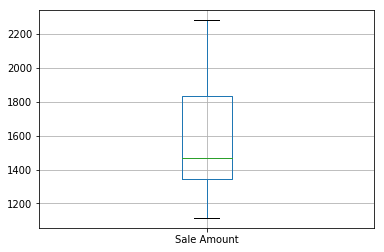

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = \
pd.read_excel('sales_2013.xlsx', sheet_name = None, index_col=None)
row_list = []
for worksheet_name, data in df.items():
    row_list.append(data)
data_frame = pd.concat(row_list, axis=0, ignore_index=True)


print(data_frame.head())
print('-'*20)
print(data_frame.tail())
print('-'*20)


total_sales = \
pd.DataFrame([float(str(value).strip('$').replace(',','')) \
              for value in data_frame.loc[:, 'Sale Amount']]).sum()
average_sales = \
pd.DataFrame([float(str(value).strip('$').replace(',','')) \
             for value in data_frame.loc[:, 'Sale Amount']]).mean()

print('total sales: ', round(float(total_sales), 2))
print('average sales: ', round(float(average_sales), 2))

df2 = data_frame[['Customer Name', 'Sale Amount']]
df2.boxplot()
plt.show()




jj2015@korea.ac.kr